In [28]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Data Set Up

In [22]:
# Import Data
us_diff = pd.read_csv('univariate_datasets/us_diff.csv', usecols=[1,2], index_col=0, parse_dates=[0])
us_uni = pd.read_csv('univariate_datasets/univariate_df_United_States.csv',usecols=[1,2], index_col=0, parse_dates=[0])
us_diff.head()

# test_train split
train_size = int(len(us_diff)*0.8)
us_diff_train, us_diff_test = us_diff[0:train_size], us_diff[train_size:]

,new_deaths
date,
2023-04-02,-338.0
2023-04-09,-17.0
2023-04-16,-439.0
2023-04-23,-92.0
2023-04-30,-152.0
2023-05-07,100.0
2023-05-14,797.0
2023-05-21,-1188.0
2023-05-28,-17.0


ADF Test Statistic : -2.5252838085816958
p-value : 0.10944306442755447
#Lags Used : 7
Number of Observations Used : 194
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None
ADF Test Statistic : -7.154085375650149
p-value : 3.0869768235518104e-10
#Lags Used : 6
Number of Observations Used : 194
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
None


<Axes: xlabel='date'>

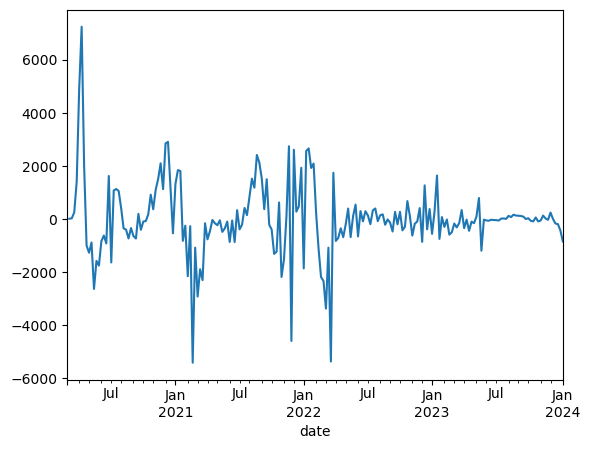

In [26]:
# checking stationarity
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
print(adfuller_test(us_uni['new_deaths']))
print(adfuller_test(us_diff['new_deaths'].dropna()))
us_diff['new_deaths'].plot()

/Users/yui/miniconda3/envs/py38/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


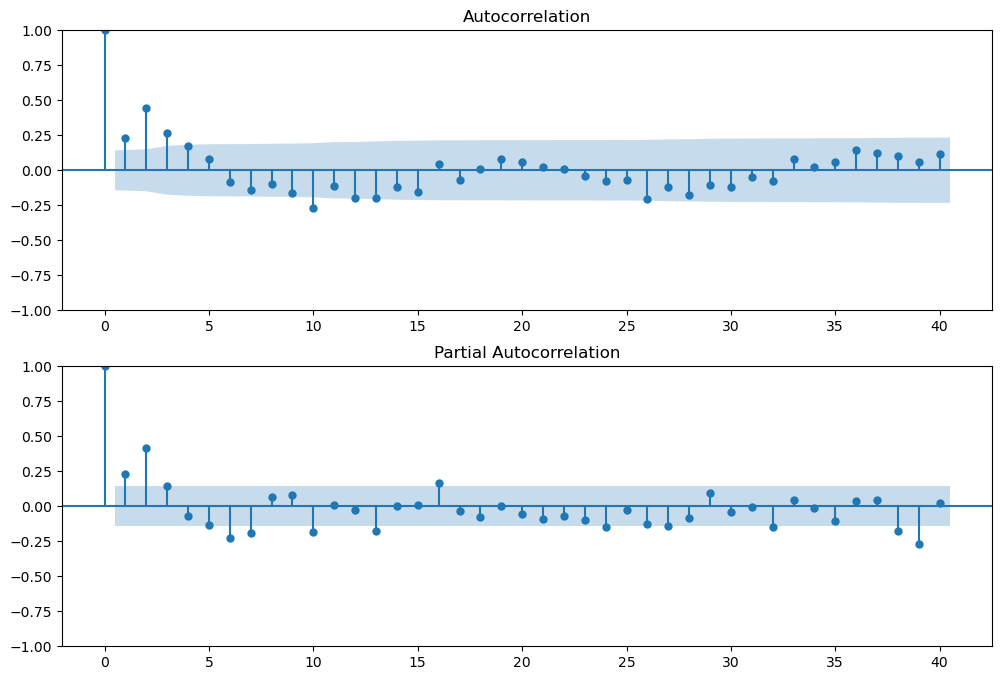

In [29]:
# ACF and PACF plots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(us_diff['new_deaths'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(us_diff['new_deaths'].iloc[13:],lags=40,ax=ax2)

# Building ARIMA

In [32]:
# For non-seasonal data
#p=1, d=1, q=1 
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

model = ARIMA(us_uni['new_deaths'], order=(1,1,1))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  202
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1716.528
Date:                Tue, 20 Feb 2024   AIC                           3439.056
Time:                        23:41:48   BIC                           3448.966
Sample:                    03-01-2020   HQIC                          3443.066
                         - 01-07-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7218      0.079      9.102      0.000       0.566       0.877
ma.L1         -0.4064      0.095     -4.274      0.000      -0.593      -0.220
sigma2      1.566e+06    8.3e+04     18.863      0.000     1.4e+06    1.73e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):               279.79
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
train_size

161

Text(0, 0.5, 'New Deaths')

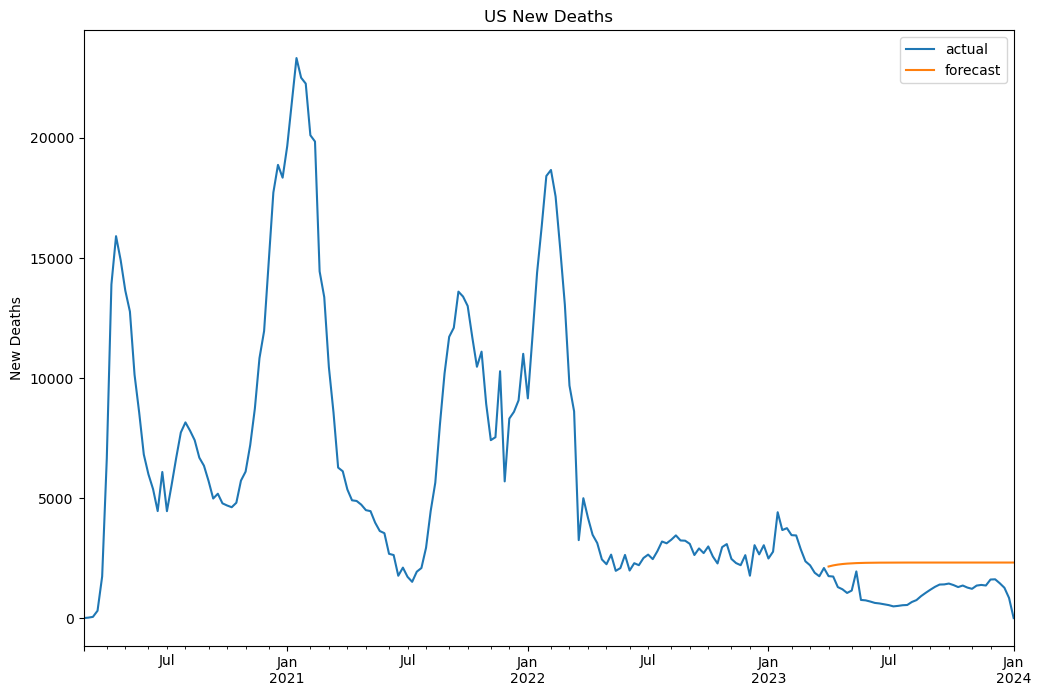

In [40]:
# evaluation 
us_prediction=model_fit.predict(start=train_size,dynamic=True)
df = pd.concat([us_uni['new_deaths'],us_prediction], axis=1)
df.columns = ['actual','forecast']
df.plot(figsize=(12,8))
# plot title and labels
plt.title('US New Deaths')
plt.ylabel('New Deaths')